In [1]:
# Importing necessary Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## DATA PREPROCESSING ##

In [5]:
# Checking for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
print("Shape of the Dataset : ",df.shape)

Shape of the Dataset :  (1470, 35)


In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
# Checking for duplicate columns
df.duplicated().sum()

0

In [9]:
# Displying the Features name.
print(df.columns, "\n")

# Finding the Number of feature in dataset.
print("No. of Features : ",len(df.columns))

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object') 

No. of Features :  35


In [10]:
unique_counts = df.apply(pd.Series.nunique)
print(unique_counts)

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

## DATA VISUALIZATION ##

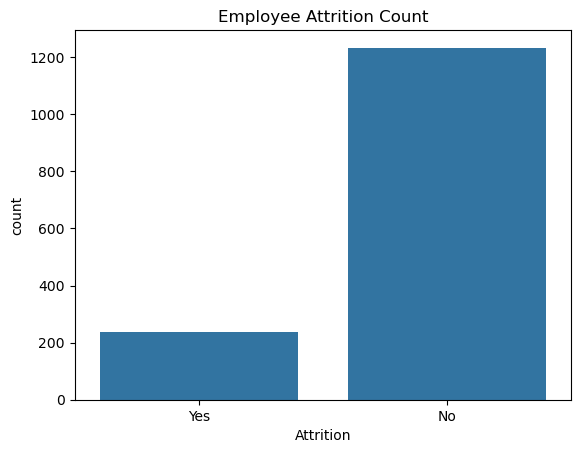

In [12]:
# Countplot
sns.countplot(x='Attrition', data=df)
plt.title("Employee Attrition Count")
plt.show()

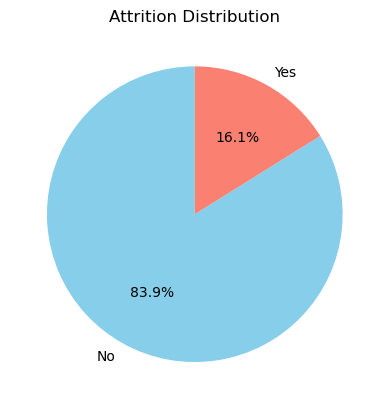

In [13]:
# Pie chart
df['Attrition'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title("Attrition Distribution")
plt.ylabel("")
plt.show()

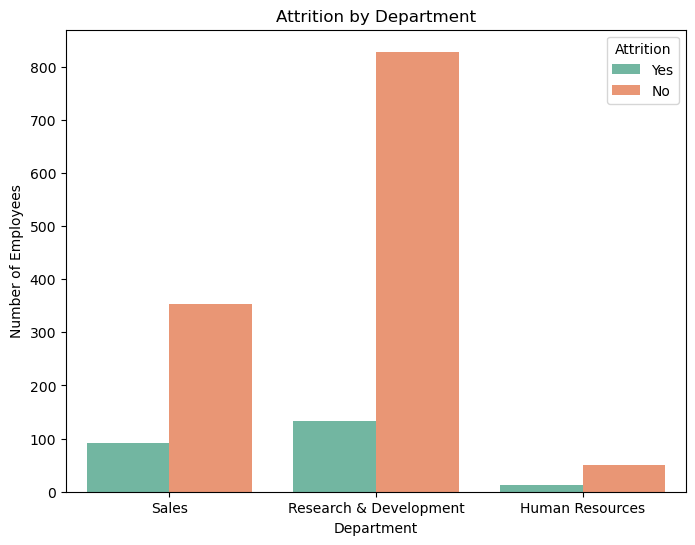

In [14]:
# Attrition vs Department
plt.figure(figsize=(8,6))
sns.countplot(x='Department', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition by Department')
plt.ylabel('Number of Employees')
plt.show()

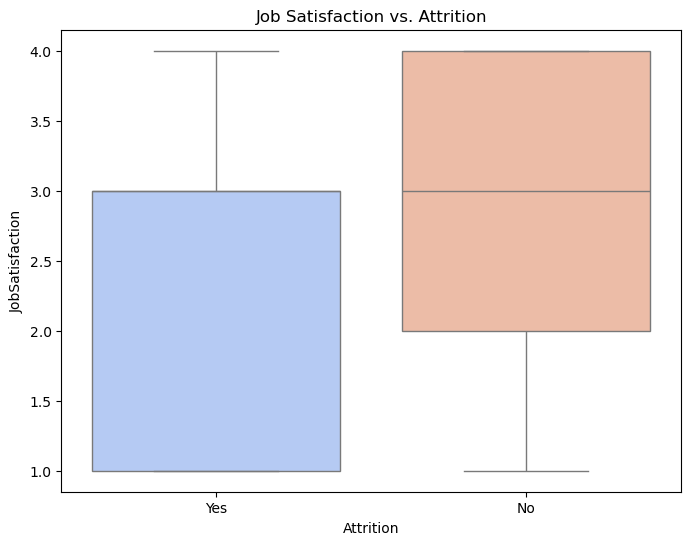

In [15]:
# Satisfaction Level vs Attrition
plt.figure(figsize=(8,6))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df, palette='coolwarm')
plt.title('Job Satisfaction vs. Attrition')
plt.show()

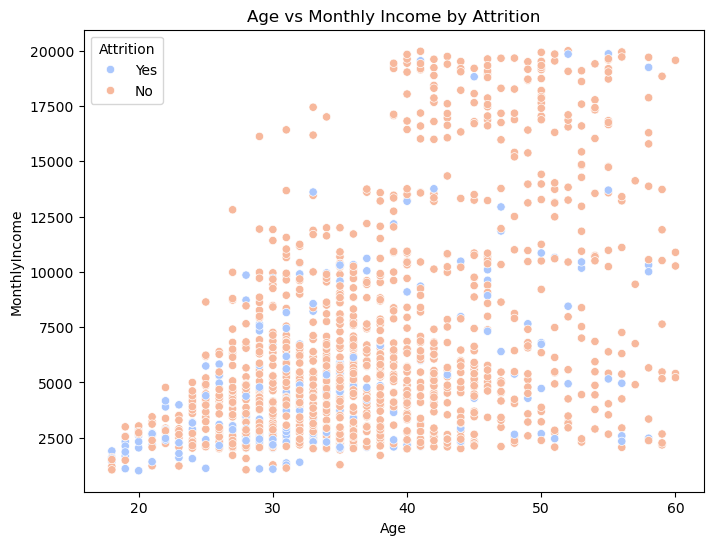

In [16]:
# Age vs Monthly Income
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=df, palette='coolwarm')
plt.title('Age vs Monthly Income by Attrition')
plt.show()

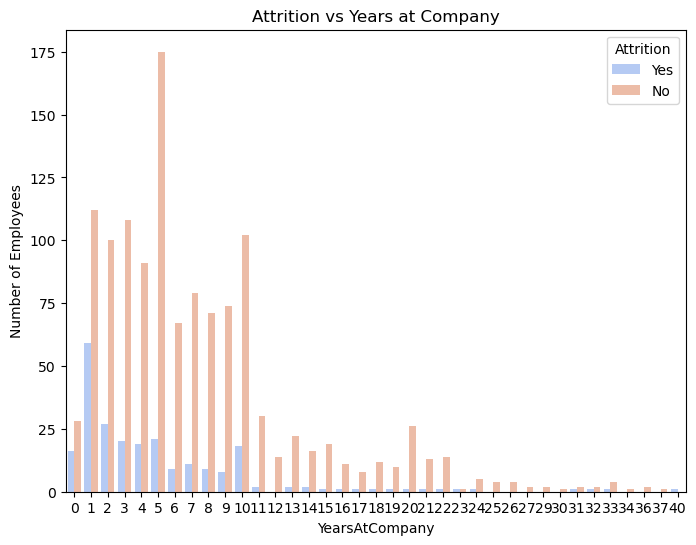

In [17]:
# Attrition Rate Across Years at Company
plt.figure(figsize=(8,6))
sns.countplot(x='YearsAtCompany', hue='Attrition', data=df, palette='coolwarm')
plt.title('Attrition vs Years at Company')
plt.ylabel('Number of Employees')
plt.show()

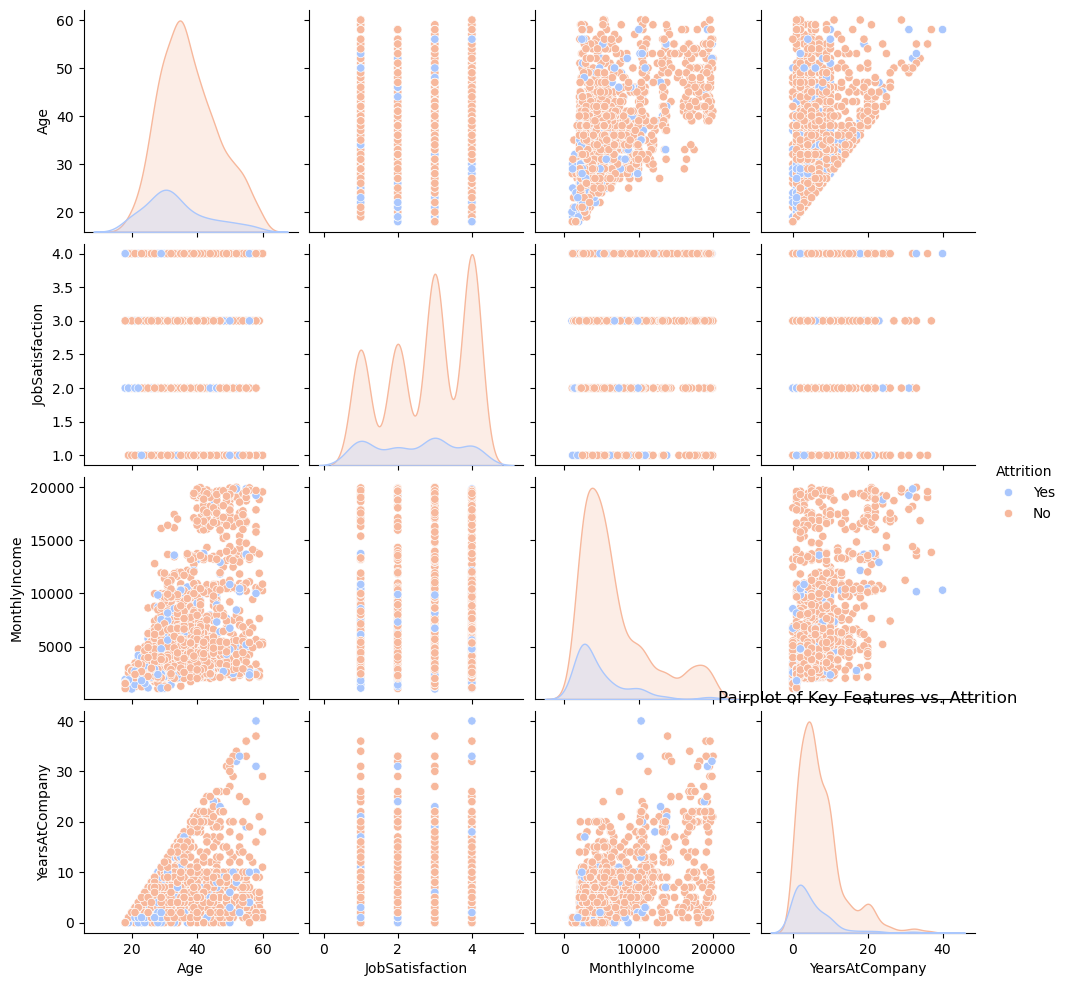

In [98]:
# Pairplot (Age, JobSatisfaction, MonthlyIncome, YearsAtCompany)
sns.pairplot(df[['Age', 'JobSatisfaction', 'MonthlyIncome', 'YearsAtCompany', 'Attrition']], hue='Attrition', palette='coolwarm')
plt.title('Pairplot of Key Features vs. Attrition')
plt.show()

## ENCODING CATEGORICAL VARIABLES ##

In [20]:
# Creating copy of the original dataframe
data = df.copy()

# Encoding the target column 'Attrition'
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Identifying object (categorical) columns to encode
label_cols = data.select_dtypes(include='object').columns

# Creating a dictionary to store encoders for each column
encoders = {}

# Applying Label Encoding and save encoders
for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le  # Storing encoder for later use

In [21]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


**HEATMAP - CORRELATION MATRIX**

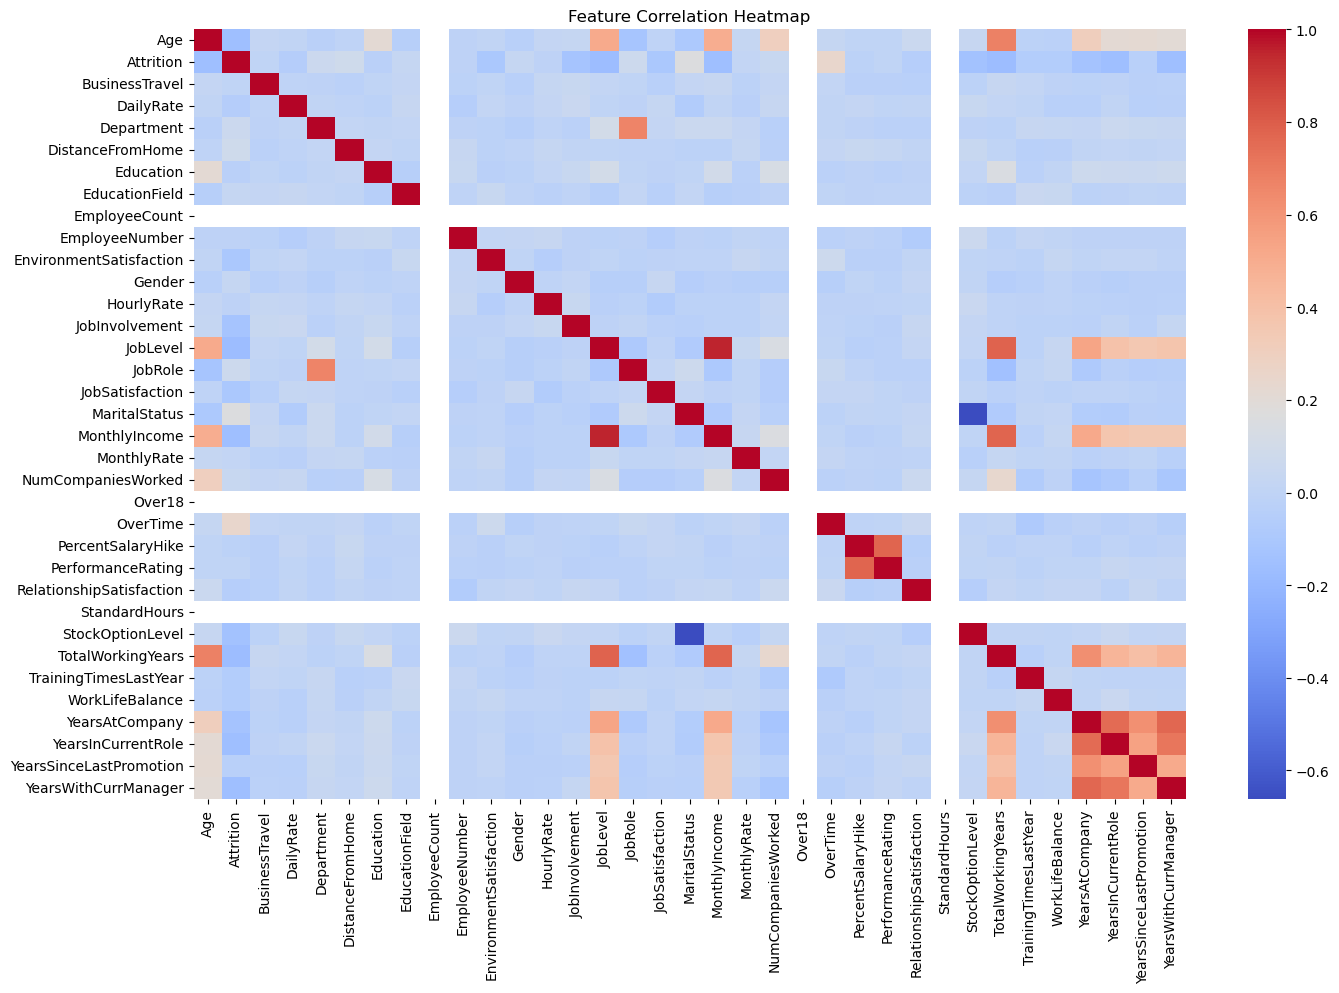

In [23]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# TRAIN-TEST SPLITTING #

In [25]:
# Creating copy of the original dataframe
data = df.copy()

# Encoding the target column 'Attrition'
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Identifying object (categorical) columns to encode
label_cols = data.select_dtypes(include='object').columns

# Applying Label Encoding for categorical columns in the features
for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Feature Engineering: Dropping less important features
features_to_drop = [
    'JobLevel', 'YearsInCurrentRole', 'JobSatisfaction', 'EnvironmentSatisfaction', 
    'TotalWorkingYears', 'RelationshipSatisfaction', 'WorkLifeBalance', 
    'StockOptionLevel', 'Age', 'JobInvolvement'
]  
X_filtered = data.drop(columns=features_to_drop)
X_filtered = X_filtered.drop('Attrition', axis=1)

In [26]:
# Split the filtered data into features (X) and target (y)
X = X_filtered
y = data['Attrition']  # Target column is already encoded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MACHINE LEARNING MODELS #

**1. LOGISTIC REGRESSION**

In [29]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [30]:
log_reg_pred = log_reg.predict(X_test)

Logistic Regression:
Accuracy: 0.8639455782312925
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       255
           1       0.33      0.03      0.05        39

    accuracy                           0.86       294
   macro avg       0.60      0.51      0.49       294
weighted avg       0.80      0.86      0.81       294

Confusion Matrix:


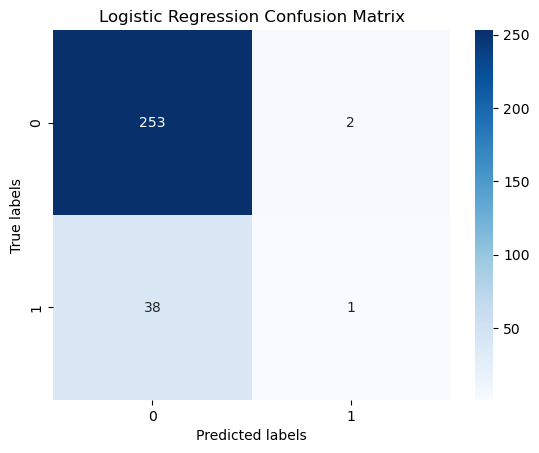

In [31]:
# LOGISTIC REGRESSION
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Classification Report:")
print(classification_report(y_test, log_reg_pred))
print("Confusion Matrix:")

fig, ax1 = plt.subplots(1)
sns.heatmap(confusion_matrix(y_test, log_reg_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
ax1.set_title('Logistic Regression Confusion Matrix')
plt.show()

**2. RANDOM FOREST CLASSIFIER**

In [33]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
rf_pred = rf.predict(X_test)

Random Forest Classifier:
Accuracy: 0.8741496598639455
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.62      0.13      0.21        39

    accuracy                           0.87       294
   macro avg       0.75      0.56      0.57       294
weighted avg       0.85      0.87      0.84       294

Confusion Matrix:


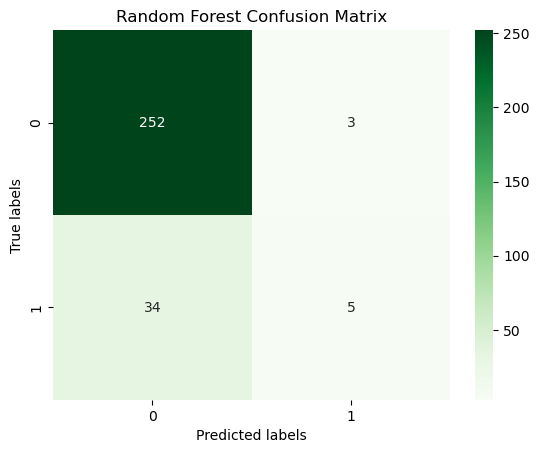

In [35]:
# RANDOM FOREST
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:")

fig, ax2 = plt.subplots(1)
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
ax2.set_title('Random Forest Confusion Matrix')
plt.show()

**3. NAIVE BAYES**

In [37]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [38]:
nb_pred = nb.predict(X_test)

Naive Bayes:
Accuracy: 0.8537414965986394
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       255
           1       0.43      0.33      0.38        39

    accuracy                           0.85       294
   macro avg       0.67      0.63      0.65       294
weighted avg       0.84      0.85      0.85       294

Confusion Matrix:


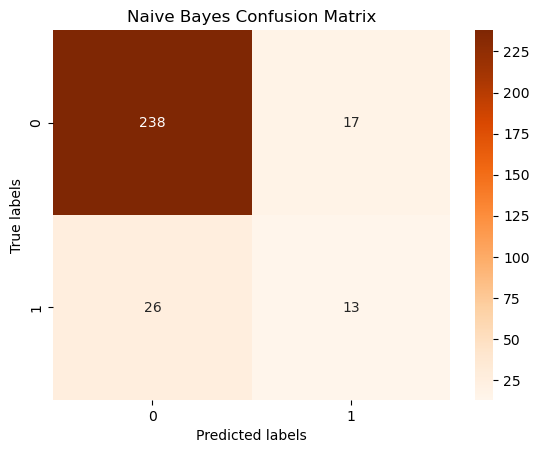

In [39]:
# NAIVE BAYES
print("Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Classification Report:")
print(classification_report(y_test, nb_pred))
print("Confusion Matrix:")

fig, ax3 = plt.subplots(1)
sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
ax3.set_title('Naive Bayes Confusion Matrix')
plt.show()

**4. K-MEANS CLUSTERING (for exploring clusters)**

In [41]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=2, random_state=42)

In [42]:
kmeans_labels = kmeans.predict(X_test)

In [43]:
print("Accuracy:", accuracy_score(y_test, kmeans_labels))
print("Cluster centers:\n", kmeans.cluster_centers_)
print("K-Means Clustering Labels (Test):\n", kmeans_labels)

Accuracy: 0.5102040816326531
Cluster centers:
 [[1.60757315e+00 8.04648881e+02 1.26850258e+00 9.40963855e+00
  2.85714286e+00 2.17555938e+00 1.00000000e+00 1.03490878e+03
  5.74870912e-01 6.64802065e+01 4.48709122e+00 1.08605852e+00
  6.61448193e+03 2.05642392e+04 2.64027539e+00 0.00000000e+00
  3.01204819e-01 1.51876076e+01 3.14457831e+00 8.00000000e+01
  2.83476764e+00 6.78485370e+00 2.12564544e+00 3.89500861e+00]
 [1.62016807e+00 7.94295798e+02 1.26050420e+00 9.11428571e+00
  2.93445378e+00 2.29075630e+00 1.00000000e+00 1.02181345e+03
  6.26890756e-01 6.68588235e+01 4.50084034e+00 1.07058824e+00
  6.15602353e+03 8.20747899e+03 2.65882353e+00 0.00000000e+00
  2.75630252e-01 1.52974790e+01 3.16638655e+00 8.00000000e+01
  2.75798319e+00 7.07058824e+00 2.08907563e+00 4.15630252e+00]]
K-Means Clustering Labels (Test):
 [0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0
 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0
 1 0 0 1 1 0 0 0 1 0 

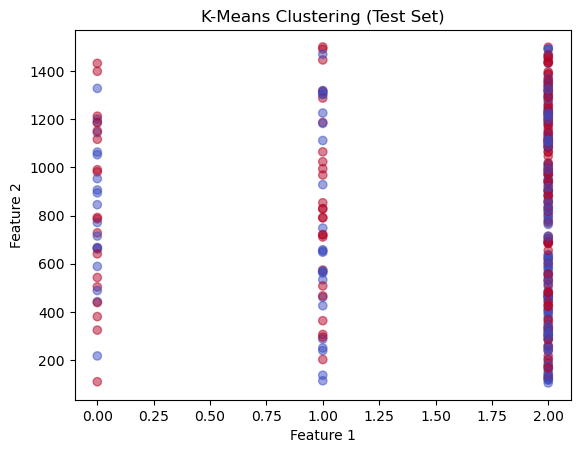

In [44]:
# Visualizing clusters (only for 2 features for simplicity)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=kmeans_labels, cmap='coolwarm', alpha=0.5)
plt.title("K-Means Clustering (Test Set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# MODEL COMPARISON #

In [46]:
# Creating a comparison table
models = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'K-Means']
accuracies = [
    accuracy_score(y_test, log_reg_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, nb_pred),
    accuracy_score(y_test, kmeans_labels)
    #np.nan  # K-Means doesn't have an accuracy score (unsupervised)
]

comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

In [47]:
comparison_df

,Model,Accuracy
0,Logistic Regression,0.863946
1,Random Forest,0.874150
2,Naive Bayes,0.853741
3,K-Means,0.510204


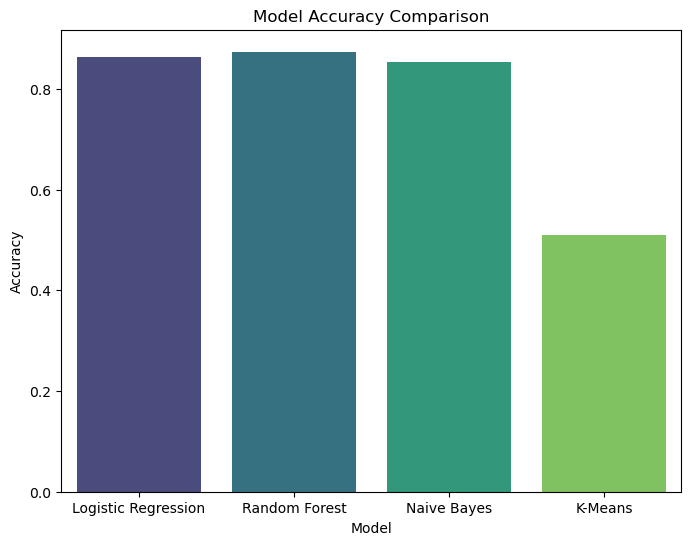

In [48]:
# Plotting accuracy comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.show()

# Predicting Attrition Manually #

In [96]:
# Creating a dictionary for a new employee's data 
new_employee = {
    'Age': 26,
    'Attrition': 1,
    'BusinessTravel': 'Travel_Frequently',
    'DailyRate': 450,
    'Department': 'Sales',
    'DistanceFromHome': 15,
    'Education': 2,
    'EducationField': 'Marketing',
    'EnvironmentSatisfaction': 1,
    'Gender': 'Male',
    'HourlyRate': 35,
    'JobInvolvement': 1,
    'JobLevel': 1,
    'JobRole': 'Sales Executive',
    'JobSatisfaction': 1,
    'MaritalStatus': 'Single',
    'MonthlyIncome': 2500,
    'MonthlyRate': 5000,
    'NumCompaniesWorked': 3,
    'OverTime': 'Yes',
    'PercentSalaryHike': 11,
    'PerformanceRating': 3,
    'RelationshipSatisfaction': 1,
    'StockOptionLevel': 0,
    'TotalWorkingYears': 3,
    'TrainingTimesLastYear': 1,
    'WorkLifeBalance': 1,
    'YearsAtCompany': 1,
    'YearsInCurrentRole': 1,
    'YearsSinceLastPromotion': 0,
    'YearsWithCurrManager': 1,
    'EmployeeCount': 1,
    'EmployeeNumber': 10000,
    'Over18': 'Y',
    'StandardHours': 40
}

# Converting to DataFrame
new_df = pd.DataFrame([new_employee])

# Dropping target column
if 'Attrition' in new_df.columns:
    new_df.drop('Attrition', axis=1, inplace=True)

# Encoding categorical features
for col in new_df.select_dtypes(include='object').columns:
    new_df[col] = encoders[col].transform(new_df[col])

# Aligning columns with training features
new_df = new_df[X.columns]

# Predicting using Random Forest Model
prediction = rf.predict(new_df)
proba = rf.predict_proba(new_df)
accuracy = rf.score(X_test, y_test)

# Results
print("Random Forest Prediction:")
print(f"Prediction: {'Yes' if prediction[0] == 1 else 'No'}")
print(f"Probability of Attrition: {proba[0][1]:.2f}")
print(f"Accuracy on Test Data: {accuracy:.2f}")

Random Forest Prediction:
Prediction: Yes
Probability of Attrition: 0.56
Accuracy on Test Data: 0.87
